# Project 2

### 1 - Import the necessary libraries

In [2]:
import numpy as np
import seaborn as sb
import pandas as pd
import scipy
import matplotlib.pyplot as plt   
import scipy.stats as st

### 2 - Read the data as a data frame 

In [3]:
df = pd.read_csv('insurance.csv')

### 3 - Perform basic EDA

#### 3a - Shape of data 

In [4]:
df.shape

(1338, 7)

#### 3b - Data type of each attribute

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### 3c - Checking the presence of missing values 
__Comparing number of NA to total number of rows as defined in shape. As shown below, there are no missing values

In [6]:
print( "Valid values in age column" , df['age'].isna().value_counts())
print ("Valid values in sex" , df['sex'].isna().value_counts())
print ("Valid values in bmi" , df['bmi'].isna().value_counts())
print ("Valid values in children" , df['children'].isna().value_counts())
print ("Valid values in smoker" , df['smoker'].isna().value_counts())
print ("Valid values in region" , df['region'].isna().value_counts())
print ("Valid values in charges" , df['charges'].isna().value_counts())
df.shape

Valid values in age column False    1338
Name: age, dtype: int64
Valid values in sex False    1338
Name: sex, dtype: int64
Valid values in bmi False    1338
Name: bmi, dtype: int64
Valid values in children False    1338
Name: children, dtype: int64
Valid values in smoker False    1338
Name: smoker, dtype: int64
Valid values in region False    1338
Name: region, dtype: int64
Valid values in charges False    1338
Name: charges, dtype: int64


(1338, 7)

#### 3d -  5 point summary of numerical attributes

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 3e Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

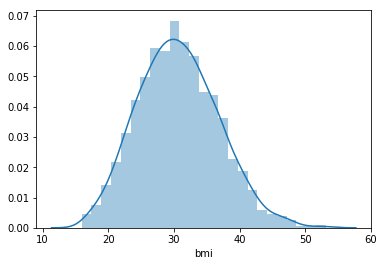

In [8]:
sb.distplot(df['bmi']);

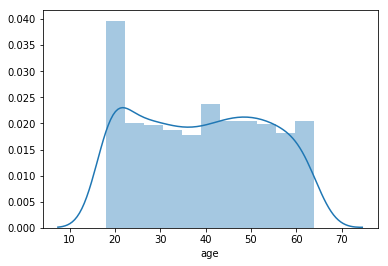

In [9]:
sb.distplot(df['age']);

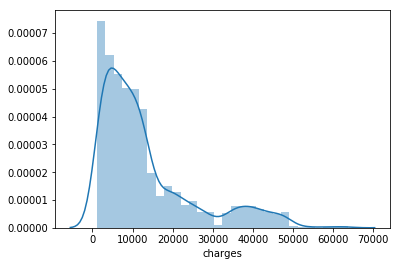

In [10]:
sb.distplot(df['charges']);

#### 3f - Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

In [11]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

#### 3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

 __i. BMI

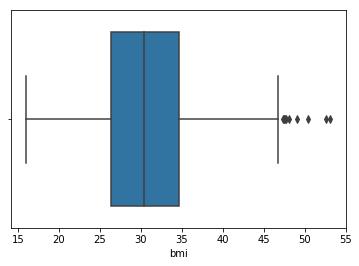

In [12]:
sb.boxplot(df['bmi'])

In [13]:
q1= np.percentile(df['bmi'],25)
q3= np.percentile(df['bmi'],75)
iqr=q3-q1
max=iqr*1.5+q3
print("max", max)

max 47.290000000000006


In [14]:
print('List of outliers: \n', df[df['bmi']>max])

List of outliers: 
       age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


For the BMI data, there are significant outliers beyond the maximum (Upper quartile +1.5*IQR range)

__ii. Age

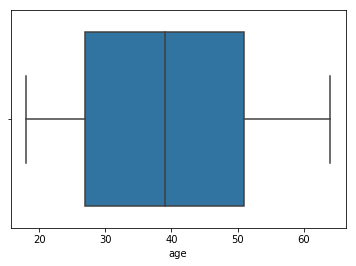

In [15]:
sb.boxplot(df['age'])

In [16]:
q1= np.percentile(df['age'],25)
q3= np.percentile(df['age'],75)
iqr=q3-q1
max=iqr*1.5+q3
print("max", max)
df[df['age']>max]

max 87.0


,age,sex,bmi,children,smoker,region,charges


No outliers for the age data

__iii Charges

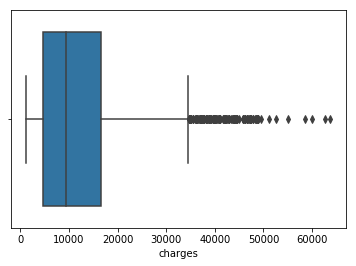

In [17]:
sb.boxplot(df['charges'])

In [18]:
q1= np.percentile(df['charges'],25)
q3= np.percentile(df['charges'],75)
iqr=q3-q1
max=iqr*1.5+q3
print("max", max)
print('List of outliers:\n',df[df['charges']>max])

max 34489.350562499996
List of outliers:
       age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
34     28    male  36.400         1    yes  southwest  51194.55914
38     35    male  36.670         1    yes  northeast  39774.27630
39     60    male  39.900         0    yes  southwest  48173.36100
49     36    male  35.200         1    yes  southeast  38709.17600
53     36    male  34.430         0    yes  southeast  37742.57570
55     58    male  36.955         2    yes  northwest  47496.49445
82     22    male  37.620         1    yes  southeast  37165.16380
84     37  female  34.800         2    yes  southwest  39836.51900
86     57  female  3

__139 cases of outliers for charges column

#### 3h. Distribution of categorical columns (include children) 

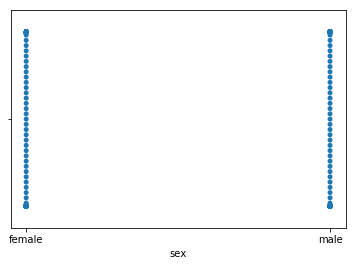

In [40]:
sb.swarmplot(x=df['sex'])

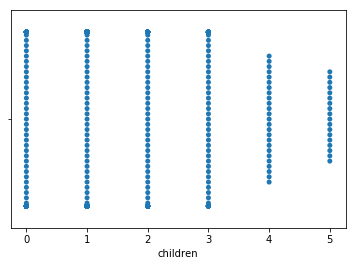

In [20]:
sb.swarmplot(x=df['children'])

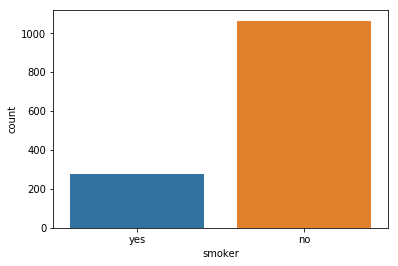

In [42]:
sb.countplot(x=df['smoker'])

#### 3i . Pair plot that includes all the columns of the data frame 

__a. For only numeric columns

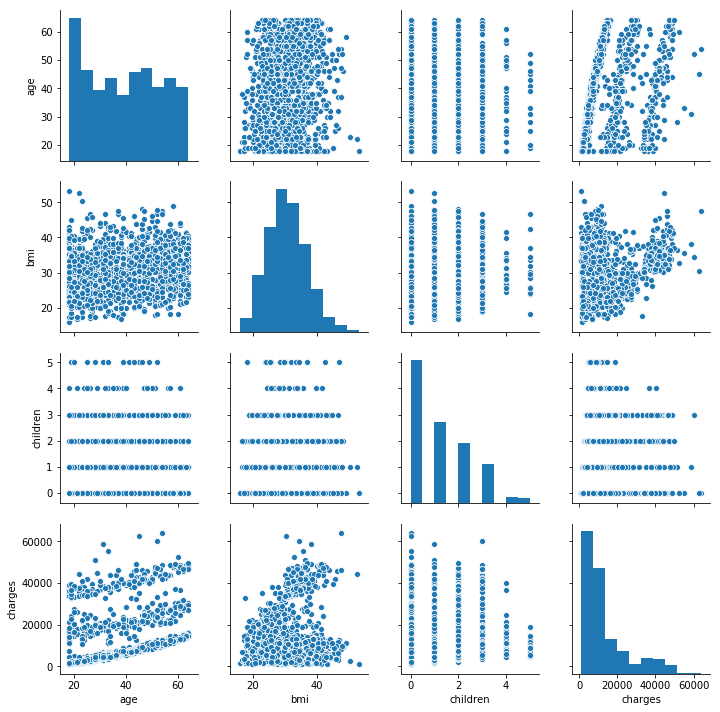

In [22]:
sb.pairplot(df)

__b. Transforming categorical dimensions into numeric dimensions

In [23]:
df1=df.copy()

In [24]:
df1.loc[df1.sex=='male', 'sex'] = 1
df1.loc[df1.sex=='female', 'sex']= 2
df1.loc[df1.smoker=='yes', 'smoker'] = 1
df1.loc[df1.smoker=='no', 'smoker']= 2
df1.loc[df1.region=='northeast', 'region'] = 1
df1.loc[df1.region=='northwest', 'region']= 2
df1.loc[df1.region=='southwest', 'region']= 3
df1.loc[df1.region=='southeast', 'region']= 4

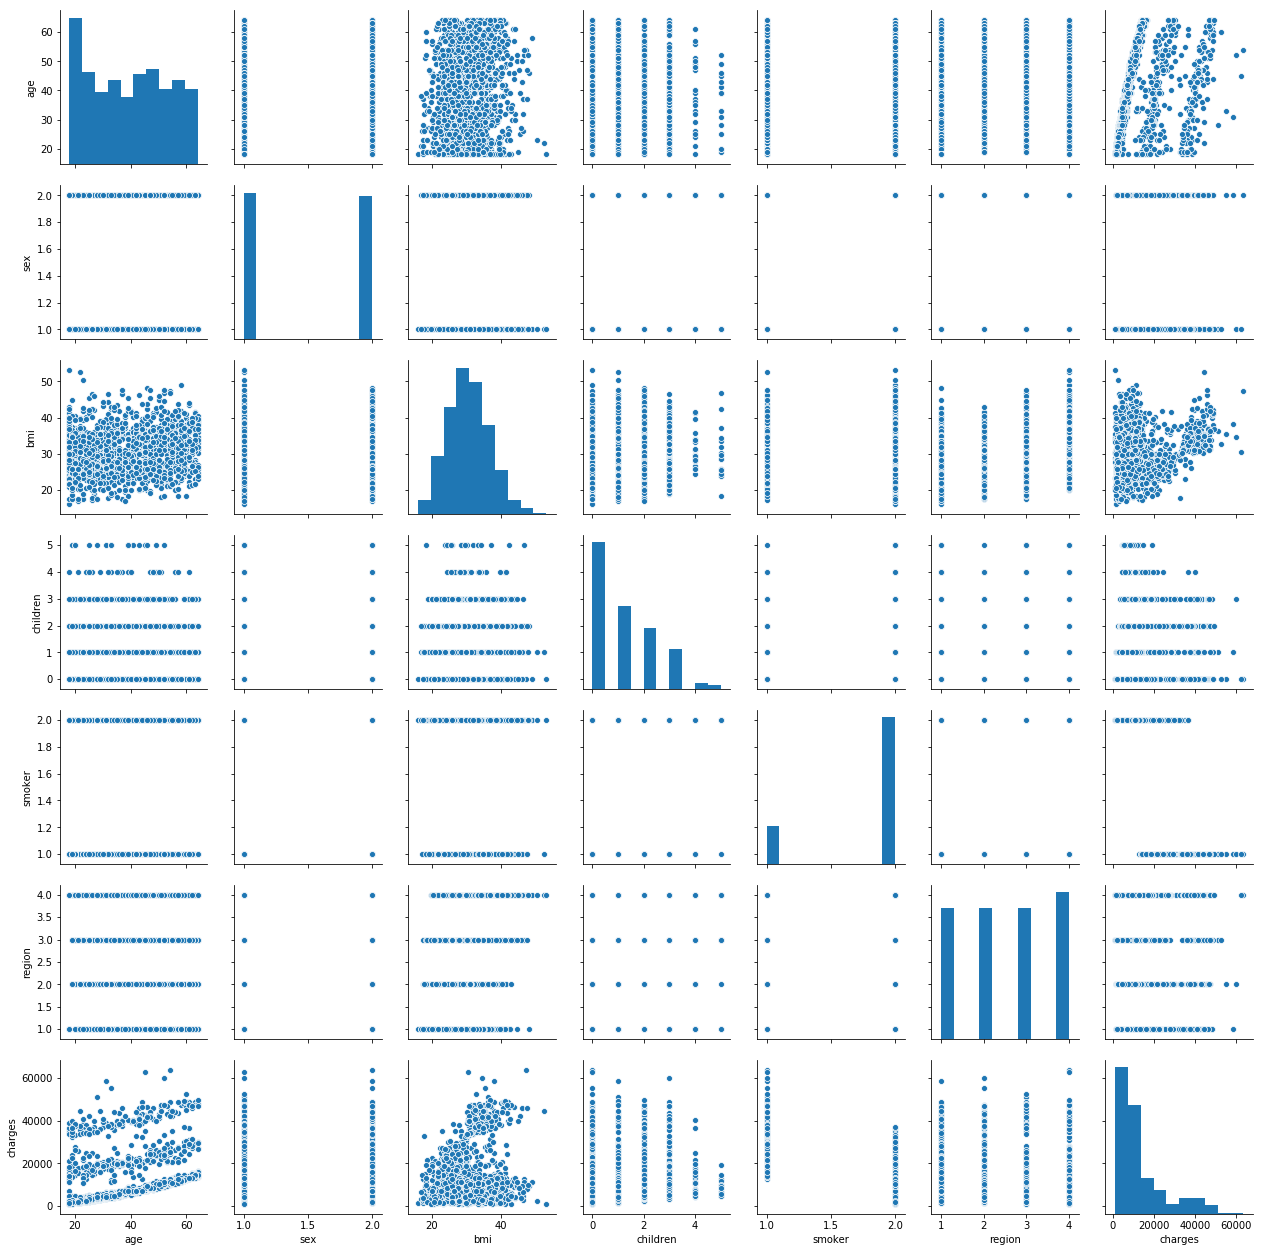

In [26]:
sb.pairplot(df1);

### 4 - Stastical analytics 

#### 4a - Do charges of people who smoke differ significantly from the people who don't? 

*__Null hypothesis H0 - Charges of people who smoke differ significantly from those who don't
    Alternate hypothesis H1 - Charges of people who smoke do not differ significantly from those who don't

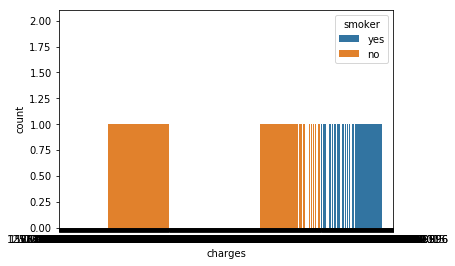

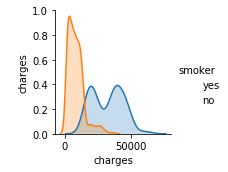

In [27]:
sb.countplot(df['charges'],hue=df['smoker']);
sb.pairplot(df[['charges', 'smoker']], hue='smoker');

__Deploy two-sample t-test

In [28]:
dfsmoke = df[df['smoker']=='yes'].copy()
dfnosmoke = df[df['smoker']=='no'].copy()


In [29]:
from scipy.stats import ttest_ind
stat, pvalue = ttest_ind(dfsmoke['charges'] , dfnosmoke['charges'])
print("Mean of smokers is: ", dfsmoke['charges'].mean() , " and mean charge for non-smokers is: " ,dfnosmoke['charges'].mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('Charges are similar for smokers and non-smokers')
else:
    print('Charges are different for smokers and non-smokers')

Mean of smokers is:  32050.23183153285  and mean charge for non-smokers is:  8434.268297856199
Tstatistic , Pvalue 46.664921172723716 8.271435842177219e-283
Charges are different for smokers and non-smokers


__While there is some area of overlap between smokers and non smokers in the charts, there is more or less a clean demarcation of the charges based on the status of the smoker column. Further, the means of the two distributions are significantly far away from each other despite the smoker's charge distribution being more wider.

__Further, the p-value for the two-sample t-test performed is 46.66 which is is significantly higher than 0.05. Hence, we cannot reject the null hypothesis 

__Hence, we can confirm that charges of people who smoke are significantly different from the people who don't

#### 4b. Does BMI of males differ significantly from that of females? 

*__Null hypothesis H0 - BMI of males differ significantly from females
    Alternate hypothesis H1 - BMI of males do not differ significantly from females

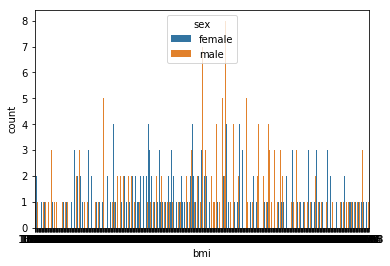

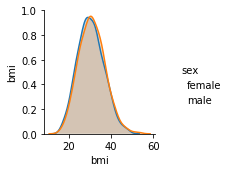

In [30]:
sb.countplot(df['bmi'],hue=df['sex']);
sb.pairplot(df[['bmi', 'sex']], hue='sex');

__Deploy two-sample t-test

In [31]:
dfmale = df[df['sex']=='male'].copy()
dffemale = df[df['sex']=='female'].copy()

In [32]:
from scipy.stats import ttest_ind
stat, pvalue = ttest_ind(dfmale['bmi'] , dffemale['bmi'])
print("Mean BMI of males is: ", dfmale['bmi'].mean() , " and mean BMI for females is: " ,dffemale['bmi'].mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('BMI for men and women are similar')
else:
    print('BMI for men and women are different')

Mean BMI of males is:  30.943128698224832  and mean BMI for females is:  30.377749244713023
Tstatistic , Pvalue 1.696752635752224 0.08997637178984932
BMI for men and women are similar


__Given the similarities in mean and standard deviation between the two sexes, we can confirm that BMI of males do not differ significantly from females. Further, given that the p-value is below 0.05 (95% confidence interval), we can reject the null hypothesis and confirm that BMI for men and women are similar

#### 4c. Is the proportion of smokers significantly different in different genders? 

*__H0 - Null hypothesis - Gender and smoking habits are independent
__H1 - Alternate hypothesis -  There is a relationship between gender and smoking habits

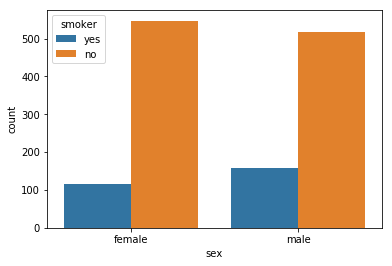

In [33]:
sb.countplot(df['sex'], hue=df['smoker']);

__Running Chi-Square test

In [34]:
act_female_smoke=df[(df['smoker']=="yes") & (df['sex']=="female")].count()
act_male_smoke=df[(df['smoker']=="yes") & (df['sex']=="male")].count()
act_female_nosmoke=df[(df['smoker']=="no") & (df['sex']=="female")].count()
act_male_nosmoke=df[(df['smoker']=="no") & (df['sex']=="male")].count()
total_male=df[(df['sex']=="male")].count()
total_female=df[(df['sex']=="female")].count()
total_smoke=df[(df['smoker']=="yes")].count()
total_nosmoke=df[(df['smoker']=="no")].count()

exp_female_smoke=total_smoke[0]*total_female[0]/(total_male[0]+total_female[0])
exp_male_smoke=total_smoke[0]*total_male[0]/(total_male[0]+total_female[0])
exp_female_nosmoke=total_nosmoke[0]*total_female[0]/(total_male[0]+total_female[0])
exp_male_nosmoke=total_nosmoke[0]*total_male[0]/(total_male[0]+total_female[0])

print("Expected women smoking: ",exp_female_smoke)
print("Actual women smoking: ",act_female_smoke[0])

print("Expected men smoking: ",exp_male_smoke)
print("Actual men smoking: ",act_male_smoke[0])

print("Expected women not smoking: ",exp_female_nosmoke)
print("Actual women not smoking: ",act_female_nosmoke[0])

print("Expected men not smoking: ",exp_male_nosmoke)
print("Actual men not smoking: ",act_male_nosmoke[0])

sqsum1=(act_female_smoke[0]-exp_female_smoke)*(act_female_smoke[0]-exp_female_smoke)/exp_female_smoke
sqsum2=(act_male_smoke[0]-exp_male_smoke)*(act_male_smoke[0]-exp_male_smoke)/exp_male_smoke
sqsum3=(act_male_nosmoke[0]-exp_male_nosmoke)*(act_male_nosmoke[0]-exp_male_nosmoke)/exp_male_nosmoke
sqsum4=(act_female_nosmoke[0]-exp_female_nosmoke)*(act_female_nosmoke[0]-exp_female_nosmoke)/exp_female_nosmoke
print("Chi-square value: ",sqsum1+sqsum2+sqsum3+sqsum4)

Expected women smoking:  135.56651718983557
Actual women smoking:  115
Expected men smoking:  138.43348281016443
Actual men smoking:  159
Expected women not smoking:  526.4334828101644
Actual women not smoking:  547
Expected men not smoking:  537.5665171898356
Actual men not smoking:  517
Chi-square value:  7.765921028604452


__For one degree of freedom and p=0.05, the critical value of alpha is 3.84. Since, our Chi-square statistic is larger than 3.84, we can reject the null hypothesis. Hence, the proportion is significantly different in different genders

#### 4d. Is the distribution of bmi across women with no children, one child and two children, the same ? 

*__H0 - The distributions of the BMI across all women with no children, one child and two children are the same
H1 - The distributions of the BMI across all women with no children, one child and two children are different

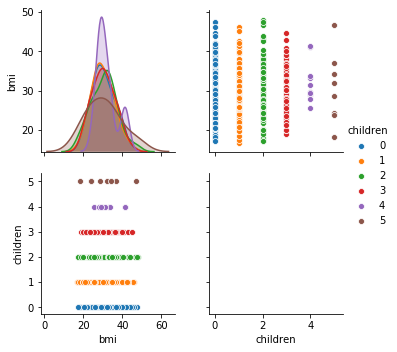

In [39]:
dfwomen_ = df[df['sex']=='female'].copy()
sb.pairplot(dfwomen_[['bmi', 'children']], hue='children')

__Performing a one-way ANOVA check

In [36]:
dfwomen_ = df[df['sex']=='female'].copy()
dfwomen_0 = dfwomen_[dfwomen_['children']==0].copy()
dfwomen_1 = dfwomen_[dfwomen_['children']==1].copy()
dfwomen_2 = dfwomen_[dfwomen_['children']==2].copy()

statistic, pvalue = scipy.stats.f_oneway(dfwomen_0['bmi'],dfwomen_1['bmi'],dfwomen_2['bmi'])
print('The f-value is :', statistic, 'and the p-value of the ANOVA curve is: ', pvalue)
if pvalue > 0.05:
    print('The p-value of: ',pvalue,' is greater than the confidence value of 0.05 and hence we cannot reject the null hypothesis')
else:
    print('The p-value of: ',pvalue,' is less than the confidence value of 0.05 and hence we can reject the null hypothesis')

The f-value is : 0.3344720147757968 and the p-value of the ANOVA curve is:  0.7158579926754841
The p-value of:  0.7158579926754841  is greater than the confidence value of 0.05 and hence we cannot reject the null hypothesis


__The p-value is greater than the alpha value and hence, the null hypothesis cannot be rejected. Hence, the distribution of the bmi is the same for women with no children, one child and two children 